# Evaluating Regression Models Exercise

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data
from statsmodels.formula.api import ols

from sklearn.metrics import mean_squared_error
from math import sqrt

### Evaluating simple linear regressions on lemonade data with other features:


### 1. Create a dataframe from the csv at https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv


In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv")
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


### 2. Make a baseline for predicting sales. (The mean is a good baseline)

In [3]:
df.Sales.mean()

25.323287671232876

Text(0.5, 1.0, 'Sales')

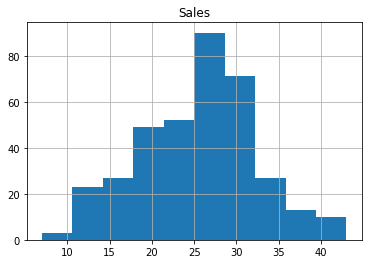

In [4]:
df.Sales.hist()
plt.title("Sales")

In [5]:
# Establish a baseline for predicting sales 
baseline = df.Sales.mean()
df['baseline'] = baseline
df['baseline_residual'] = round((df.baseline - df.Sales),2)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,baseline,baseline_residual
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,25.323288,15.32
1,1/2/17,Monday,28.9,1.33,15,0.5,13,25.323288,12.32
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,25.323288,10.32
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,25.323288,8.32
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,25.323288,7.32


### 3. Create a new dataframe to hold residuals.


In [6]:
residuals = pd.DataFrame()

### 4. Calculate the baseline residuals.


In [7]:
residuals['baseline'] = round(df.Sales.mean(),2)
residuals['baseline_residual'] = round((df.baseline - df.Sales),2)
residuals.head()

,baseline,baseline_residual
0,NaN,15.32
1,NaN,12.32
2,NaN,10.32
3,NaN,8.32
4,NaN,7.32


### 5. Use ols from statsmodels to create a simple linear regression (1 independent variable, 1 dependent variable) to predict sales using flyers.

In [8]:
# the df variable is lemonade data
# model = ols('sales ~ flyers', data=df).fit()
# predictions = model.predict(df.x)

In [9]:
model_1 = ols('Sales ~ Flyers', data=df).fit()

### 6. Use the .predict method from ols to produce all of our predictions. Add these predictions to the data



In [10]:
residuals["yhat1"] = model_1.predict(df)

### 7. Calculate that model's residuals.



In [11]:
residuals["model_1_residual"] = residuals.yhat1 - df.Sales
residuals.head()

,baseline,baseline_residual,yhat1,model_1_residual
0,NaN,15.32,14.673754,4.673754
1,NaN,12.32,14.673754,1.673754
2,NaN,10.32,19.727926,4.727926
3,NaN,8.32,20.149107,3.149107
4,NaN,7.32,22.255013,4.255013


### 8. Evaluate that model's performance and answer if the model is significant.

In [12]:
r2 = model_1.rsquared
r2*100

64.8318980562741

### 9. Evaluate that model's performance and answer if the feature is significant.

In [13]:
baseline_sse = ((df.baseline_residual**2).sum())
model_sse = ((residuals.model_1_residual**2).sum())

if model_sse < baseline_sse:
    print("Our model beats the baseline!")
else:
    print("Our baseline is better than the model.")

Our model beats the baseline!


# Repetition Improves Performance!

## Rainfall column

In the next section of your notebook, perform the steps above with the rainfall column as the model's feature. 
- Does this model beat the baseline? 
- Would you prefer the rainfall model over the flyers model?

In [14]:
x = df.Rainfall
y = df.Sales

residuals = pd.DataFrame({'x': x,
                          'y': y})

In [15]:
residuals['baseline_residual'] = df.baseline - df.Sales

In [16]:
model_2 = ols('Sales ~ Rainfall', data=df).fit()

In [17]:
residuals['yhat'] = model_2.predict(df.Rainfall)

In [18]:
residuals['model_2_residuals'] = residuals.yhat - residuals.y

In [19]:
residuals.head()

,x,y,baseline_residual,yhat,model_2_residuals
0,2.00,10,15.323288,-1.599602,-11.599602
1,1.33,13,12.323288,13.773142,0.773142
2,1.33,15,10.323288,13.773142,-1.226858
3,1.05,17,8.323288,20.197573,3.197573
4,1.00,18,7.323288,21.344793,3.344793


In [20]:
baseline_sse = (residuals.baseline_residual**2).sum()
model_sse = (residuals.model_2_residuals**2).sum()

In [21]:
if model_sse < baseline_sse:
    print("Our model beats the baseline!")
    print(f"SSE: {model_sse:.2f} < {baseline_sse:.2f}")
    # print(f"{baseline_sse/model_sse:.2f}")
    print("Let's evaluate the model with a few more tests.")
else:
    print("This model does not outperform the baseline.")

Our model beats the baseline!
SSE: 2998.24 < 17297.85
Let's evaluate the model with a few more tests.


## Log_rainfall column

In the next section of your notebook, perform the steps above with the log_rainfall column as the model's feature. 
- Does this model beat the baseline? 
- Would you prefer the log_rainfall model over the flyers model? 
- Would you prefer the model built with log_rainfall over the rainfall model from before?


In [22]:
df['log_rainfall'] = np.log(df.Rainfall)


In [23]:
x = df.Rainfall
y = df.Sales

residuals = pd.DataFrame({'x': x,
                          'y': y})

In [24]:
residuals['baseline_residual'] = df.baseline - df.Sales


In [25]:
model_3 = ols('Sales ~ log_rainfall', data=df).fit()


In [26]:
residuals['yhat'] = model_3.predict(df.log_rainfall)


In [27]:
residuals['model_3_residuals'] = residuals.yhat - residuals.y


In [28]:
baseline_sse = (residuals.baseline_residual**2).sum()
model_sse = (residuals.model_3_residuals**2).sum()

In [29]:
if model_sse < baseline_sse:
    print("Our model beats the baseline!")
    print(f"SSE: {model_sse:.2f} < {baseline_sse:.2f}")
    # print(f"{baseline_sse/model_sse:.2f}")
    print("Let's evaluate the model with a few more tests.")
else:
    print("This model does not out perform the baseline.")

Our model beats the baseline!
SSE: 952.33 < 17297.85
Let's evaluate the model with a few more tests.


## Temperature column

In the next section of your notebook, perform the steps above with the temperature column as the model's only feature. 
- Does this model beat the baseline?    
- Would you prefer the rainfall, log_rainfall, or the flyers model?


In [30]:
x = df.Rainfall
y = df.Sales

residuals = pd.DataFrame({'x': x,
                          'y': y})


In [31]:
residuals['baseline_residual'] = df.baseline - df.Sales


In [32]:
model_4 = ols('Sales ~ Flyers', data=df).fit()

In [33]:
residuals['yhat'] = model_4.predict(df.Flyers)


In [34]:
residuals['model_4_residuals'] = residuals.yhat - residuals.y


In [35]:
baseline_sse = (residuals.baseline_residual**2).sum()
model_sse = (residuals.model_4_residuals**2).sum()

In [36]:
if model_sse < baseline_sse:
    print("Our model beats the baseline!")
    print(f"SSE: {model_sse:.2f} < {baseline_sse:.2f}")
    # print(f"{baseline_sse/model_sse:.2f}")
    print("Let's evaluate the model with a few more tests.")
else:
    print("This model does not out perform the baseline.")

Our model beats the baseline!
SSE: 6083.33 < 17297.85
Let's evaluate the model with a few more tests.


### Which of these 4 single regression models would you want to move forward with?

# Tips dataset


### 1. Load the tips dataset from pydataset or seaborn


In [37]:
df = data("tips")

### 2. Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill.


In [38]:
x = df.total_bill
y = df.tip
baseline_model = df.tip.mean()
baseline_residuals = df.tip - baseline_model

residuals = pd.DataFrame({'x': x,
                          'y': y,
                          'baseline_model': baseline_model,
                          'baseline_residuals': baseline_residuals
                         })

### 3. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. Here is some sample code to get you started:

In [39]:
# from statsmodels.formula.api import ols
# from pydataset import data

# df = data("tips")

# model = ols('tip ~ total_bill', data=df).fit()
# predictions = model.predict(df.x)

In [40]:
model = ols('tip ~ total_bill', data=df).fit()
predictions = model.predict(df.total_bill)

In [41]:
residuals['yhat'] = predictions
residuals['model_residuals'] = residuals.yhat - residuals.y

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [42]:
# Model SSE, MSE, RMSE
model_sse = (residuals.model_residuals**2).sum()

mse = mean_squared_error(residuals.y, residuals.yhat)

rmse = sqrt(mse)

print("OLS Model")
print(f"SSE: {model_sse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

OLS Model
SSE: 252.79
MSE: 1.04
RMSE: 1.02


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).



In [43]:
# Baseline SSE, MSE, RMSE
model_sse = (residuals.baseline_residuals**2).sum()

mse = mean_squared_error(residuals.y, residuals.baseline_residuals)

rmse = sqrt(mse)

print("Baseline Model")
print(f"SSE: {model_sse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Baseline Model
SSE: 465.21
MSE: 8.99
RMSE: 3.00


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [44]:
if model_sse < baseline_sse:
    print("Our model beats the baseline!")
    print(f"SSE: {model_sse:.2f} < {baseline_sse:.2f}")
    # print(f"{baseline_sse/model_sse:.2f}")
    print("Let's evaluate the model with a few more tests.")
else:
    print("This model does not out perform the baseline.")

Our model beats the baseline!
SSE: 465.21 < 17297.85
Let's evaluate the model with a few more tests.


### 7. What is the amount of variance explained in your model?



In [45]:
rsquared = model.rsquared
rsquared

0.45661658635167646

### 8. Is your model significantly better than the baseline model?



In [46]:
alpha = .05
f_pval = model.f_pvalue

if f_pval < alpha:
    print("Model is significantly better than the baseline model")
    print(f"{f_pval:.2f} < {alpha}")
else:
    print("Back to the drawing board!")

Model is significantly better than the baseline model
0.00 < 0.05


### 9. Plot the residuals for the linear regression model that you made.

In [47]:
def residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('Residual ($y - \hat{y}$)')
    plt.xlabel('Actual Value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

residuals(residuals.y, residuals.yhat)

AttributeError: 'function' object has no attribute 'y'